# Exploratory work on the ABPI Disclosure data

This  notebook sets out our initial exploratory analysis of the new ABPI Disclosure data on payments from drug companies to individual UK doctors and institutions. An iPython notebook allows full transparency on how data was analysed, with results presented alongside the analytic code. This notebook was written by Anna Powell-Smith of [www.ebmdatalab.net](http://www.ebmdatalab.net) in the University of Oxford, with input from the investigations team at the BMJ and Ben Goldacre at the DataLab. You are welcome to use any of the findings below, but please note that the code has not been peer-reviewed and may contain errors, use these results at your own peril!

The ABPI data is released in two Excel sheets: a "payments" sheet containing every payment to an individual Healthcare Organistion (HCO) or individual Healthcare Provider (HCP) that has not been redacted, and an "aggregates" sheet containing total redacted payments by pharmaceutical company and category. For ease, we include CSV copies of these in the accompanying `data` directory. Please refer to the ABPI for licence details.

Journalists were told at the press conference that around 50% of the payments had been redacted, or about 70% of the value of all payments. Also, details of research funding are not included in the Disclosure database.

Useful links: 

- [Raw data, guidance notes about how the sums were calcluated, and methodological notes by company](http://www.abpi.org.uk/our-work/disclosure/Pages/DocumentLibrary.aspx).
- [The ABPI's own search interface](https://abp-eu-ags.emea.crm.cegedim.com/AggregateSpend360/Posting/ExpenseReport.aspx?postedreporttype=pCctRQJCLQc%3d&reportID=+XHrmDAjLQvO209YxDgJkw%3d%3d&Language=NyRIIBaAuMY9s3bTmUSGXQW6yEjsGDHz&DataValue=qWE1R12&LCID=2057) - only returns 100 rows at a time. 

The ABPI licence (included with the raw data) seems to permit analysis. However it seems that it may explicitly forbid redistribution of the data. The explanatory notes for the data, provided by the ABPI, are unclear; and neither the ABPI nor their data team have responded to questions over the 24 hours since the data was released. 





In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

dtype = {
    'Title': str,
    'First Name': str,
    'Last Name': str,
    'Speciality': str,
    'Institution Name': str
}
df = pd.read_csv('./data/payments.csv', dtype=dtype)

## Basic statistics

Calculate number of rows, unique institutions, etc in the payments data. 

In [2]:
print "{:,} rows".format(len(df))
print "£{:,} total declared".format(df['Amount'].sum())
print len(df['Company Name'].unique()), 'companies'
print len(df['Organisation Name'].unique()), 'organisations'
print len(df['Speciality'].unique()), 'specialities'
print len(df['Institution Name'].unique()), 'institutions'
# df.describe(include='all')

50,519 rows
£81,012,756.47 total declared
107 companies
4696 organisations
79 specialities
3468 institutions


Quickly calculate the breakdown between payments to individuals and payments to organisations. 

In [3]:
df_hcps = df[pd.isnull(df['Organisation Name'])]
df_hcos = df[~pd.isnull(df['Organisation Name'])]
a = "{:,} payments to HCOs ({:,.2f}% of total payments)"
print a.format(len(df_hcos), 100 * len(df_hcos) / float(len(df)))
a = "{:,} payments to HCPs ({:,.2f}% of total payments)"
print a.format(len(df_hcps), 100 * len(df_hcps) / float(len(df)))
print 

a = "£{:,} paid to HCOs ({:,.2f}% of total payments)"
print a.format(df_hcos['Amount'].sum(), 100 * df_hcos['Amount'].sum() / df['Amount'].sum())
a = "£{:,} paid to HCPs ({:,.2f}% of total payments)"
print a.format(df_hcps['Amount'].sum(), 100 * df_hcps['Amount'].sum() / df['Amount'].sum())

20,040 payments to HCOs (39.67% of total payments)
30,479 payments to HCPs (60.33% of total payments)

£56,450,186.61 paid to HCOs (69.68% of total payments)
£24,562,569.86 paid to HCPs (30.32% of total payments)


In [4]:
# This is what the raw payments data looks like!
df.head()

,Company Name,Title,First Name,Last Name,Organisation Name,Location,Speciality,City,Country of Principal Practice,Institution Name,Address Line1,Address Line2,Post Code,County,TOV Category,TOV Type,Amount,Joint Working Link
0,Teva UK Limited,Mrs,Francesca,Aaen,NaN,NHS Lanarkshire - Pharmacy Department,Pharmacist,Airdrie,United Kingdom,Monklands General Hospital,Monkscourt Avenue,NaN,ML6 0JS,Lanarkshire,Fee for service and consultancy,Fees,650.00,NaN
1,Teva UK Limited,Mrs,Francesca,Aaen,NaN,NHS Lanarkshire - Pharmacy Department,Pharmacist,Airdrie,United Kingdom,Monklands General Hospital,Monkscourt Avenue,NaN,ML6 0JS,Lanarkshire,Fee for service and consultancy,Related expenses agreed in the fee for service...,5.30,NaN
2,Eli Lilly & Company Ltd,Mrs,Susan,Aarons,NaN,Anchor Trust,Nurse,Bradford,United Kingdom,Ashcroft,Kelvin Way,NaN,BD2 3EF,West Yorkshire,Contribution to costs of Events,Travel & Accommodation,15.00,NaN
3,Meda Pharma,Doctor,Dawn,Aaronson,NaN,Dr R E Adams & Partners,General Medicine,Redhill,United Kingdom,Woodlands Surgery,5 Woodlands Road,NaN,RH1 6EY,Surrey,Contribution to costs of Events,Travel & Accommodation,60.00,NaN
4,Teva UK Limited,_,Christina,Abarno,NaN,NaN,Miscellaneous,Oxford,United Kingdom,Nuffield Department of Clinical Neurosciences,"Level 6, West Wing, John Radcliffe Hospital",NaN,OX3 9DU,Undefined,Contribution to costs of Events,Travel & Accommodation,399.86,NaN


Most payments are small! 50% are below £355, 75% are below £800. Only 1,164 payments are more than £10,000. 

In [5]:
print df['Amount'].describe()
print len(df[df['Amount'] > 10000]), 'payments overall are more than £10,000'

print '\nPayments to organisations:'
print df_hcos['Amount'].describe()
print '\nPayments to individuals:'
print df_hcps['Amount'].describe()

count     50519.00
mean       1603.61
std       11807.18
min      -62399.71
25%         180.00
50%         355.32
75%         800.00
max     1125000.00
Name: Amount, dtype: float64
1164 payments overall are more than £10,000

Payments to organisations:
count     20040.00
mean       2816.88
std       18544.75
min      -62399.71
25%         200.00
50%         300.00
75%         858.95
max     1125000.00
Name: Amount, dtype: float64

Payments to individuals:
count   30479.00
mean      805.89
std      1831.43
min     -1500.00
25%       170.00
50%       394.11
75%       800.00
max     87954.56
Name: Amount, dtype: float64


## What are the biggest single payments to individuals?

Print the top individual payments... they're all 'Fees for service and consultancy'.

In [6]:
df_hcps.sort_values('Amount', ascending=False).head()

,Company Name,Title,First Name,Last Name,Organisation Name,Location,Speciality,City,Country of Principal Practice,Institution Name,Address Line1,Address Line2,Post Code,County,TOV Category,TOV Type,Amount,Joint Working Link
151,Allergan Ltd,Doctor,Rajeev,Acquilla,NaN,Dr Raj Acquilla,General Medicine,Northwich,United Kingdom,The Gatehouse,1 St Marys Drive,NaN,CW8 2EZ,Cheshire,Fee for service and consultancy,Fees,87954.56,NaN
16046,Teva UK Limited,Professor,Brian,Lipworth,NaN,NHS Tayside - Respiratory Medicine Dept,Pneumology,Dundee,United Kingdom,Ninewells Hosp & Med School,Dundee,NaN,DD1 9SY,Angus,Fee for service and consultancy,Fees,83112.00,NaN
23057,GlaxoSmithKline plc,Doctor,Peter,Ratcliffe,NaN,Oxford Univ Hospitals NHS FT - Renal Medicine ...,Nephrology,Oxford,United Kingdom,Churchill Hospital,Old Road,NaN,OX3 7LE,Oxfordshire,Fee for service and consultancy,Fees,54700.86,NaN
11957,Alexion Pharma UK Ltd,Doctor,Anita,Hill,NaN,Bradford Teaching Hosp FT - Haematology Depart...,Haematology,Bradford,United Kingdom,Bradford Royal Infirmary,Duckworth Lane,NaN,BD9 6RJ,West Yorkshire,Fee for service and consultancy,Fees,46100.00,NaN
10616,Lundbeck Ltd,Doctor,Carsten,Grimm,NaN,On Trak,Substance Abuse,Huddersfield,United Kingdom,On Trak Huddersfield,2 St. Peters Street,NaN,HD1 1RA,West Yorkshire,Fee for service and consultancy,Fees,45971.98,NaN


Why are there a few negative payments?

In [7]:
df.sort_values('Amount').head()[['Company Name', 'Organisation Name', 'TOV Type', 'Amount']]

,Company Name,Organisation Name,TOV Type,Amount
37882,Pfizer Ltd,Institute of Cancer Policy,Donations and Grants to HCOs,-62399.71
32882,Merck Sharp & Dohme Ltd,British Society for Rheumatology,Sponsorship agreements with HCOs /3rd parties,-30000.00
37409,Pfizer Ltd,Healthcare At Home,Fees,-3351.55
44593,Pfizer Ltd,Ryl College Emergency Medicine,Sponsorship agreements with HCOs /3rd parties,-3000.00
48524,Pfizer Ltd,University College London,Sponsorship agreements with HCOs /3rd parties,-3000.00


Payment distribution by each TOV category/type, in the payments data. 

In [8]:
df.groupby(('TOV Category', 'TOV Type')).sum().sort_values('Amount', ascending=False)

Amount
TOV Category                    TOV Type                                                      
Donations and Grants to HCOs    Donations and Grants to HCOs                       28764932.33
Fee for service and consultancy Fees                                               22371761.15
Contribution to costs of Events Sponsorship agreements with HCOs /3rd parties      15999826.91
                                Travel & Accommodation                              5480353.79
Joint working                   Joint working                                       3234248.94
Fee for service and consultancy Related expenses agreed in the fee for services...  2657719.07
Contribution to costs of Events Registration Fees                                   2503572.50
Fee for service and consultancy Travel & Accommodation                                  341.78

## Start to compare the declared and undeclared data 

Now we can start comparing the "payments" (declared) data with the "aggregate" (undeclared) data. We know that the aggregate data sheet *only* contains information about suppressed payments. 

Start by looking at the raw data on undeclared payments.

In [9]:
df_aggregate = pd.read_csv('./data/aggregates.csv')
df_aggregate.head()

,Company Name,Title,First Name,Last Name,Organisation Name,Location,Speciality,City,Country of Principal Practice,Institution Name,Address Line1,Address Line2,Post Code,County,TOV Category,TOV Type,Amount,Joint Working Link,% of all HCP HCO in Aggregate,No of HCP HCO in Aggregate
0,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Registration Fees,0.00,nan,2.79,nan
1,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Registration Fees,0.00,nan,nan,7.00
2,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Registration Fees,3406.45,nan,nan,nan
3,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Travel & Accommodation,0.00,nan,17.53,nan
4,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Travel & Accommodation,0.00,nan,nan,44.00


## How much is missing?

By my calculations, the declared payments cover £81m, and the undeclared payments cover £282m, so 78% of all spending is undeclared. Note that "R&D" makes up a big chunk of this and we know from the press conference that *no* R&D payments are declared. 

In [48]:
undeclared_payments = df_aggregate['Amount'].sum()
declared_payments = df['Amount'].sum()
total_payments = undeclared_payments + declared_payments

print 'Total payments undeclared:', "£{:,}".format(undeclared_payments)
print 'Total payments declared:', "£{:,}".format(declared_payments)
print 'Percentage undeclared: {:.2f}%'.format(undeclared_payments / total_payments * 100)

df_agg_ex_rd = df_aggregate[df_aggregate['TOV Category'] != 'Research & Development']
undeclared_payments_ex_rd = df_agg_ex_rd['Amount'].sum()
print 'Total payments on R&D (none of which are declared):', "£{:,}".format(undeclared_payments - undeclared_payments_ex_rd)
print 'Total payments undeclared ex R&D:', "£{:,}".format(undeclared_payments_ex_rd)

Total payments undeclared: £282,797,449.25
Total payments declared: £81,012,756.47
Percentage undeclared: 77.73%
Total payments on R&D (none of which are declared): £253,613,146.83
Total payments undeclared ex R&D: £29,184,302.42


## Examine the gaps in the data, by company

With the limited and redacted data we have, perhaps the most meaningful thing we can look at is the amount of data that is undeclared!

The only thing we know about the undeclared payments is the amount of it for each company, in each TOV category, and the number of HCOs/HCPs which the undeclared payments cover. 

We can therefore derive, by comparing this with the payments that *are* declared, per-company values for the total amount that was undeclared, and the total number of HCOs/HCPs that chose not to declare themsleves. 

Perhaps this will reveal interesting differences. 

In [11]:
# Get all aggregate payments but EXCLUDE R&D. 
# This is because NO R&D payments are included in the payments sheet, so 
# including them in our per-company analyses will distort results.  
df_agg_by_co = df_agg_ex_rd.groupby(('Company Name')).sum().reset_index()
df_agg_by_co.rename(columns={'No of HCP HCO in Aggregate': 'No of HCP HCO'}, inplace=True)
df_agg = df_agg_by_co[['Company Name', 'Amount', 'No of HCP HCO']]

# We've already created dataframes for unique HCOs and HCPs: now get the sums
# and counts of these, and merge them. There's probably a better way to do this. 
df_hcos_by_co = df_hcos.groupby('Company Name')['Amount'].agg(['sum','count']).reset_index()
df_hcps_by_co = df_hcps.groupby('Company Name')['Amount'].agg(['sum','count']).reset_index()
df_m = pd.merge(df_hcos_by_co, df_hcps_by_co, on='Company Name', suffixes=('_hco', '_hcp'))
df_m['Amount'] = df_m['sum_hco'] + df_m['sum_hcp']
df_m['No of HCP HCO'] = df_m['count_hco'] + df_m['count_hcp']
df_declared = df_m[['Company Name', 'Amount', 'No of HCP HCO']]

df_combined = pd.merge(df_declared, df_agg, on='Company Name', 
                        suffixes=(' Declared', ' Undeclared'))

# Calculate totals, proportions etc. 
df_combined['Total Amount'] = df_combined['Amount Declared'] + df_combined['Amount Undeclared']
df_combined['Total HCOs/HCPs'] = df_combined['No of HCP HCO Declared'] + df_combined['No of HCP HCO Undeclared']
df_combined['Proportion of names undeclared'] = df_combined['No of HCP HCO Undeclared'] / \
    df_combined['Total HCOs/HCPs'] * 100
df_combined['Proportion of total amount undeclared'] = df_combined['Amount Undeclared'] / \
    df_combined['Total Amount'] * 100
    
# Print summary stats about the proportion of undeclared payments.
# Note that this number is lower than the 77% above, because we've excluded R&D. 
print 'Total % names undeclared:', "{:.2f}%".format(df_combined['No of HCP HCO Undeclared'].sum() / \
    df_combined['Total HCOs/HCPs'].sum() * 100)
print 'Total % amount undeclared:', "{:.2f}%".format(df_combined['Amount Undeclared'].sum() / \
    df_combined['Total Amount'].sum() * 100)

Total % names undeclared: 33.96%
Total % amount undeclared: 26.92%


In [12]:
# Show all companies for which total amount > £1 million,
# sorted by the total amount undeclared.
# Again, these are flattering numbers because we've excluded R&D.
# In most cases, it looks as though the payments that are undeclared are the 
# smaller payments - i.e. probably those to individuals. Sanofi seems to be an exception.
# Note how GSK is an outlier too. 
df_combined.sort_values('Proportion of total amount undeclared', inplace=True, ascending=False)
df_combined[df_combined['Total Amount'] > 1000000]

,Company Name,Amount Declared,No of HCP HCO Declared,Amount Undeclared,No of HCP HCO Undeclared,Total Amount,Total HCOs/HCPs,Proportion of names undeclared,Proportion of total amount undeclared
53,Merck Sharp & Dohme Ltd,1353418.62,1105,3041484.00,2524.00,4394902.62,3629.00,69.55,69.20
57,Napp Pharmaceuticals Ltd,704232.35,541,1074987.46,1341.00,1779219.81,1882.00,71.25,60.42
7,Allergan Ltd,883775.20,391,1040011.45,1271.00,1923786.65,1662.00,76.47,54.06
25,Boehringer Ingelheim Ltd,948732.57,815,826901.12,815.00,1775633.69,1630.00,50.00,46.57
37,Eli Lilly & Company Ltd,1410567.01,1889,1158566.00,1645.00,2569133.01,3534.00,46.55,45.10
19,Bayer Plc,4309603.44,3184,3165949.91,2080.00,7475553.35,5264.00,39.51,42.35
60,Novo Nordisk Limited,2229700.56,1064,1608824.37,1378.00,3838524.93,2442.00,56.43,41.91
75,Servier Laboratories Ltd,790342.00,530,569220.00,573.00,1359562.00,1103.00,51.95,41.87
13,Astellas Pharma Ltd,1534556.98,2074,809591.70,1300.00,2344148.68,3374.00,38.53,34.54
81,Takeda UK Ltd,1166643.88,1139,567654.40,573.00,1734298.28,1712.00,33.47,32.73


In [13]:
# Double-check a sample row in the table above, against the raw data,
# to make sure we've got things right....
print df_agg_by_co[df_agg_by_co['Company Name'] == 'Napp Pharmaceuticals Ltd'][['Amount', 'No of HCP HCO']]
print df[df['Company Name'] == 'Napp Pharmaceuticals Ltd'].sum()['Amount']
print len(df_hcps[df_hcps['Company Name'] == 'Napp Pharmaceuticals Ltd']['Last Name'])
print len(df_hcos[df_hcos['Company Name'] == 'Napp Pharmaceuticals Ltd']['Organisation Name'])

       Amount  No of HCP HCO
62 1074987.46        1341.00
704232.35
142
399


In [14]:
# Save all data to CSV.
df_combined.to_csv('declared_vs_aggregated_payments_by_company.csv')

## Compare undeclared payments by category

As above, but looking for which categories have the largest share of undeclared payments.

In [15]:
# As above, EXCLUDE R&D. 
df_agg_by_cat = df_agg_ex_rd.groupby('TOV Category').sum().reset_index()
df_agg_cat = df_agg_by_cat[['TOV Category',  'Amount']]
df_by_cat = df.groupby(('TOV Category')).sum().reset_index()
df_merged_cat = pd.merge(df_agg_cat, df_by_cat, on=['TOV Category'], 
                     suffixes=(' Aggregate', ' Declared'))
df_merged_cat['Total Amount'] = df_merged_cat['Amount Declared'] + \
    df_merged_cat['Amount Aggregate']
df_merged_cat['Proportion Undeclared'] = df_merged_cat['Amount Aggregate'] / \
    df_merged_cat['Total Amount']
df_merged_cat.sort_values('Proportion Undeclared', ascending=False, inplace=True)
df_merged_cat.to_csv('declared_vs_aggregated_payments_by_category.csv')
df_merged_cat

,TOV Category,Amount Aggregate,Amount Declared,Total Amount,Proportion Undeclared
2,Fee for service and consultancy,21018335.46,25029822.00,46048157.46,0.46
0,Contribution to costs of Events,7468459.12,23983753.20,31452212.32,0.24
1,Donations and Grants to HCOs,697507.84,28764932.33,29462440.17,0.02


## The individuals with the most declared payments

Anyone using this should check manually that each of these is truly the same person, rather than several people with the same name. We could further reduce this possibility by grouping by institution too, but then might miss individuals working across different institutions, so best to check manually I think. 

Note that individuals who don't remove themselves from the dataset are good and should be celebrated!

In [16]:
df_individual = df.groupby(('Last Name', 'First Name', 'Speciality')).sum().reset_index()
df_individual.sort_values(by='Amount', ascending=False).head(20)

,Last Name,First Name,Speciality,Amount
11135,Pavord,Ian,Pneumology,98702.92
8214,Lipworth,Brian,Pneumology,96647.00
92,Acquilla,Rajeev,General Medicine,93287.66
5395,Gribben,John,Haematology,90108.66
10283,Nelson,Mark,Venereology,75115.45
2599,Choy,Ernest,Rheumatology,68935.17
3837,Drake,Marcus,Urology,68897.30
6151,Hill,Anita,Haematology,68711.04
1833,Brown,Ashley,Hepatology,64847.32
7025,Jones,Paul,Pneumology,64134.89


## Payments by pharma co

These are the *declared* payments, not the undeclared payments. Not sure how meaningful this is really. 

In [17]:
df_by_co = df.groupby('Company Name').agg(['sum', 'mean', 'median', 'count'])
df_by_co.sort_values(by=('Amount', 'sum'), ascending=False).head(10)

Amount                      
                                       sum     mean median count
Company Name                                                    
Pfizer Ltd                      6905728.17  1814.91 363.44  3805
GlaxoSmithKline plc             5704678.15  2706.20 360.00  2108
AstraZeneca                     5505380.24  1459.93 350.00  3771
Novartis Pharmaceuticals UK Ltd 5015272.58  2226.04 467.00  2253
Janssen-Cilag Ltd               4847919.43  1289.00 346.80  3761
Bayer Plc                       4309603.44  1353.52 434.50  3184
Biogen Idec Ltd                 3465163.04 13175.52 970.70   263
UCB Pharma Ltd                  2954987.53  5760.21 400.00   513
Roche Products Limited          2857887.54  2943.24 420.80   971
Novo Nordisk Limited            2229700.56  2095.58 357.00  1064

## Payments by pharma companies by category

Break down the above table by category, too. Again, this is only *declared* payments. 

In [18]:
#  df[['Company Name', 'TOV Category', 'Amount']].head()
df.groupby(('Company Name', 'TOV Category')).sum().sort_values('Amount', ascending=False).head(10)

Amount
Company Name        TOV Category                              
GlaxoSmithKline plc Fee for service and consultancy 2998707.38
AstraZeneca         Fee for service and consultancy 2542336.32
UCB Pharma Ltd      Donations and Grants to HCOs    2524037.00
Bayer Plc           Donations and Grants to HCOs    2523765.28
Pfizer Ltd          Donations and Grants to HCOs    2442880.18
                    Fee for service and consultancy 2245509.04
AstraZeneca         Contribution to costs of Events 2240105.57
Pfizer Ltd          Contribution to costs of Events 2164160.45
Biogen Idec Ltd     Donations and Grants to HCOs    1993005.57
GlaxoSmithKline plc Donations and Grants to HCOs    1757652.73

## Payments by pharma companies by speciality

Break down the above table by speciality, too. Again, this is only *declared* payments. 

In [19]:
df_by_co_and_speciality = df.groupby(('Company Name', 'Speciality')).sum()\
    .sort_values('Amount', ascending=False).reset_index()

total = df_by_co_and_speciality.groupby('Company Name')['Amount'].transform('sum')
df_by_co_and_speciality['% of Co Spend'] = df_by_co_and_speciality['Amount']/total * 100

print df_by_co_and_speciality.head(10)
# Validate % calculation
# print df_by_co_and_speciality[df_by_co_and_speciality['Company Name'] == 'AstraZeneca']['% of Company Total Spend'].sum()
df_by_co_and_speciality.to_csv('payments_by_co_and_speciality.csv')

             Company Name        Speciality    Amount  % of Co Spend
0             AstraZeneca          Diabetes 475170.97          19.99
1             AstraZeneca        Pneumology 444114.96          18.68
2     GlaxoSmithKline plc        Pneumology 439736.05          32.19
3       Janssen-Cilag Ltd             Nurse 343192.11          17.09
4    Novo Nordisk Limited          Diabetes 333990.23          58.00
5             AstraZeneca        Cardiology 332412.72          13.98
6             AstraZeneca             Nurse 308429.89          12.97
7  Roche Products Limited          Oncology 282609.38          35.27
8          Sanofi Aventis          Diabetes 267567.26          40.17
9             AstraZeneca  General Medicine 261823.47          11.01


## Payments by organisation

Again, these are the declared payments - we can't break down the aggregate payments this way. 

In [20]:
df_by_org = df.groupby('Organisation Name').agg(['sum', 'mean', 'median', 'count'])
df_by_org.sort_values(by=('Amount', 'sum'), ascending=False).head(10)

Amount                         
                                        sum      mean   median count
Organisation Name                                                   
King's College London            2425028.93 186540.69 15506.03    13
School of Hygiene & Trop Med     1166557.48  72909.84   462.38    16
PeerVoice                        1162535.37 105685.03 78438.24    11
Healthcare At Home               1084103.99  60228.00 96879.00    18
University College London         972864.76  15201.01  3000.00    64
Quintiles                         853296.76 142216.13 10377.52     6
British Society for Rheumatology  613988.91  19806.09  9000.00    31
Royal Hants County Hospital       607773.51  37985.84   125.00    16
King's College Hospital           539243.72   7703.48   550.00    70
Adelphi Group Ltd                 515606.70  85934.45 25164.40     6

## Payments by speciality

Again, these are the declared payments - we can't break down the aggregate payments this way. 

Nurses get more payments than anyone else, but they certainly don't get the highest mean payment. 

Write the data to a CSV file for further analysis. 

In [21]:
df_by_spec = df.groupby('Speciality').agg(['sum', 'mean', 'median', 'count']).sort_values(by=('Amount', 'sum'), ascending=False)
print df_by_spec.head(10)
df_by_spec.to_csv('by_speciality.csv')

                     Amount                     
                        sum    mean median count
Speciality                                      
Nurse            2620201.76  420.31 233.07  6234
Oncology         1890781.09  999.88 514.32  1891
Haematology      1882802.26 1114.08 500.00  1690
Pneumology       1619318.92 1281.11 480.00  1264
Diabetes         1613718.55 1070.11 535.38  1508
General Medicine 1549744.07  808.00 350.00  1918
Miscellaneous    1214805.23  722.24 300.00  1682
Cardiology       1095473.54  991.38 500.00  1105
Rheumatology      949008.33 1022.64 508.50   928
Gastroenterology  929236.33  743.39 450.32  1250


## Payments by specialty, with custom groupings

Create three groups: Nurses, Pharmacists, Doctors, and Other, and run the same analysis

In [44]:
# Normalise the specialties
def specialty_classifier(row):
    other = ['Healthcare Administration',
             'Microbiology',
             'Laboratory - Medical Analysis',
             'Research',
             'Occupational Therapist',
             'Wholesaler', 
             'Miscellaneous']
    pharmacists = ['Clinical Pharmacology', 'Pharmacist']
    nurses = ['Nurse']
    classification = 'HCO'
    if row['Speciality'] in other:
        classification = 'Other'
    elif row['Speciality'] in pharmacists:
        classification = 'Pharmacists'
    elif row['Speciality'] in nurses:
        classification = 'Nurses'
    elif str(row['Speciality']) != "nan":
        # XXX there must be a nicer way to filter out pd.nan values...
        classification = 'Doctors'
    return classification

df['Normalised specialty'] = df.apply(specialty_classifier, axis=1)

# Re-run the analysis   
df.groupby('Normalised specialty').agg(['sum', 'mean', 'median', 'count']).sort_values(by=('Amount', 'sum'), ascending=False)

Amount                      
                             sum    mean median  count
Normalised specialty                                  
HCO                  56450186.61 2816.88 300.00  20040
Doctors              19001227.48  949.78 473.57  20006
Nurses                2620201.76  420.31 233.07   6234
Other                 2245768.16  741.91 350.00   3027
Pharmacists            695372.46  573.74 302.62   1212

## Unique individuals by speciality

We can work out how many uniquely-named individuals there are in each speciality as follows.

"General Medicine" probably != GPs, since Raj Acquilla is in this category and we know him to be a plastic surgeon. 

In [23]:
df_individual = df.groupby(('Last Name', 'First Name', 'Speciality')).sum().reset_index()
df_individual.groupby('Speciality').count().sort_values("Last Name", ascending=False)

,Last Name,First Name,Amount
Speciality,,,
Nurse,4002,4002,4002
Miscellaneous,1214,1214,1214
General Medicine,1028,1028,1028
Oncology,703,703,703
Pharmacist,638,638,638
Haematology,622,622,622
Diabetes,585,585,585
Cardiology,564,564,564
Gastroenterology,519,519,519


## Exploratory work to understand undeclared payments

This isn't interesting of itself, but I'm trying to work out what the various columns in the Aggregates tab mean. 

This just here as an example of data in the two tabs so I can try to work out how they fit together. 

In [24]:
df_sample = df[(df['Company Name'] == 'Genzyme') & (df['TOV Type'] == 'Fees')]
df_sample.describe(include='all')
# print len(df_sample), 'rows'
# df_sample['Amount'].sum()

,Company Name,Title,First Name,Last Name,Organisation Name,Location,Speciality,City,Country of Principal Practice,Institution Name,Address Line1,Address Line2,Post Code,County,TOV Category,TOV Type,Amount,Joint Working Link,Normalised specialty
count,58,56,56,56,2,58,56,58,58,55,58,3,58,58,58,58,58.00,0.00,58
unique,1,5,53,55,2,49,15,26,1,33,36,3,36,25,1,1,nan,0.00,3
top,Genzyme,Doctor,Alison,Wilson,Medical Sciences,Salford Royal NHS FT - Neurology Department,Neurology,London,United Kingdom,The Royal Free Hospital,Pond Street,Nottingham University Hospital,NW3 2QG,Greater London,Fee for service and consultancy,Fees,nan,nan,Doctors
freq,58,34,3,2,1,3,19,17,58,6,6,1,6,17,58,58,nan,nan,41
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2793.53,nan,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6997.00,nan,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,nan,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,nan,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808.00,nan,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.00,nan,NaN


## Distribution of payments

(Not very interesting) Most individual payments are very small. 25% are below £180, 50% are below £355, 70% are below £800.

See histogram and note the log scale on the y-axis. 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


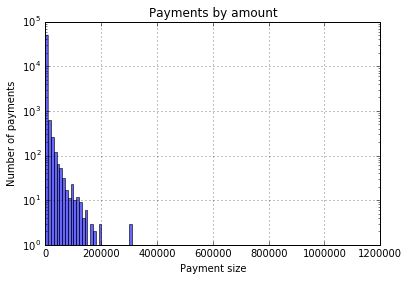

In [25]:

%pylab inline
plt.figure()
bin_range = np.arange(0, 1100000, 10000)
df['Amount'].plot(kind='hist', bins=bin_range, color='blue', alpha=0.6)
plt.ylabel("Number of payments")
plt.xlabel("Payment size")
plt.yscale('log', nonposy='clip')
plt.title("Payments by amount")
plt.grid()
